# **MLP ARCHITECTURES ON MNIST DATASET**
Data Source **[https://www.kaggle.com/c/digit-recognizer/data](https://www.kaggle.com/c/digit-recognizer/data)**

This dataset contains hand-written imageswhich are numbered from 0-9. It contains a total of 70k images.


![](https://corochann.com/wp-content/uploads/2017/02/mlp-800x367.png)

## ** SNIPPET**
1. Converted the Images into vectors using Flattening.
2. Applied Different MLP architectures i.e 2, 3 & 5 hidden layer on the dataset. 
3. Done one-hot encoding on class labels.
4. Calculated Train & Valiadation Loss to determine the performance and to ensure best fit.
5. Compared performance of each architecture using accuracy.
6. Conclusion based on the obtained results.

##  **OBJECTIVE**
Making different MLP architectures on MNIST dataset and analyzing the model's on the basis of loss and accuracy.

## **IMPORTING**

In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from prettytable import PrettyTable
from keras.layers import Dropout
from keras.optimizers import Adam,RMSprop,SGD
import matplotlib.pyplot as plt
import numpy as np
import time

## **LOADING**

Loading the MNIST dataset and showing the dimensions of train and test dataset.

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Contains the image in 28 X 28 pixels.

In [23]:
print("Train Dataset Shape -: ",x_train.shape)
print("Test Dataset Shape -: ",x_test.shape)

Train Dataset Shape -:  (60000, 28, 28)
Test Dataset Shape -:  (10000, 28, 28)


## **FLATTENING**

Flattening the images in 784 dimensions so the the data can be provided to the algorithm.

In [0]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [25]:
print("Train Dataset Shape -: ",x_train.shape)
print("Test Dataset Shape -: ",x_test.shape)

Train Dataset Shape -:  (60000, 784)
Test Dataset Shape -:  (10000, 784)


## **NORMALIZING**

The data is not normalized therefore it is not in it's generalized form so the values are divided by 255 as the rgb values lies between 0-255 so we will normalize the data between 0-1. If value has 0 value it means white on the other hand if it has 1 value that means black.

In [26]:
print(x_train[0][200:300])

[  0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56
  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253 253 253
 253 253 198 182 247 241   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  80 156 107 253 253 205  11   0  43 154   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  14
   1 154 253  90   0   0   0   0   0   0]


In [0]:
x_train = x_train/255
x_test = x_test/255

In [28]:
print(x_train[0][200:300])

[0.         0.         0.         0.19215686 0.93333333 0.99215686
 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.99215686 0.98431373 0.36470588 0.32156863 0.32156863 0.21960784
 0.15294118 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.07058824 0.85882353 0.99215686 0.99215686 0.99215686
 0.99215686 0.99215686 0.77647059 0.71372549 0.96862745 0.94509804
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.31372549 0.61176471 0.41960784 0.99215686 0.99215686 0.80392157
 0.04313725 0.         0.16862745 0.60392157 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05490196
 0.00392157 0.60392157 0.99215686 0.35294118 0.         0.


## **ONE-HOT ENCODING**

We are converting our class labels into 10 dimensional vectors and we are doing so because of MLP's.

In [29]:
print("Class Label -: ",y_train[0])
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print("Class Label After Converting to Vector -: ",y_train[0])

Class Label -:  5
Class Label After Converting to Vector -:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## **FUNCTIONS USED**

This function takes a **History** object which is a dictionary containing the losses and accuracy on validation and train dataset at each epochs. It further calls **plt_dynamic** function with parameters as epochs and losses.

In [0]:
def Plot(err):
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Crossentropy Loss')
  x = list(range(1,25+1))
  v_loss = err.history['val_loss']
  t_loss = err.history['loss']
  plt_dynamic(x, v_loss, t_loss, ax)

This function takes five parameters i.e epochs, losses and color and plots the graph between epochs & Crossentropy Losses.

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.title("EPOCH VS LOSS" ,fontsize=15, color='black')
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# **MLP ARCHITECTURES**
![](https://1.bp.blogspot.com/-Xal8aZ5MDL8/WlJm8dh1J9I/AAAAAAAAAo4/uCj6tt4T3T0HHUY4uexNuq2BXTUwcChqACLcBGAs/s1600/Multilayer-Perceptron.jpg)



### These are the **Optimizers**,** Losses**, **Functions** etc used in the below architectures.

1.   Activation Function

  *   **Relu**
  *   **softmax**
2.   **Batch Normalization**
3.   **Dropout**
4.   Initializer
  *  **Random Normal**
  *  **he_normal**
5.   Optimizer
  *  **Adam**
6.  Loss
  *  **Crossentropy Loss**
7. Metrics
  *  **Accuracy** 

## ***2 -  Hidden Layer Architecture***



In [67]:
'''
  Here we are declaring our model.
  Now we will add layers to the network.
  Dense got the output as : Output = output = activation(dot(input, kernel) + bias)
  Here the activation function used are relu and softmax.
  The initializer used is randomnormal.
  There are 2 hidden layers -: 784(INPUT LAYER) -> 512(HIDDEN LAYER) -> 128(HIDDEN LAYER) -> 10(OUTPUT LAYER)
'''

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(10, activation='softmax'))

print(model_relu.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
'''
  Configuring the learning process through compile function.
  Accept three arguments optimizer, loss & metrics.
  After compiling we fit it on training data and pass the epochs and batchsize to it.
'''

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=128, epochs=20, verbose=0, validation_data=(x_test, y_test)) 

In [70]:
#  Analyzing the Loss and Accuracy on Test Dataset.

score = model_relu.evaluate(x_test, y_test, verbose=0) 
print('Loss:', score[0]) 
print('Accuracy:', score[1])

Loss: 0.0648279936808568
Accuracy: 0.9838


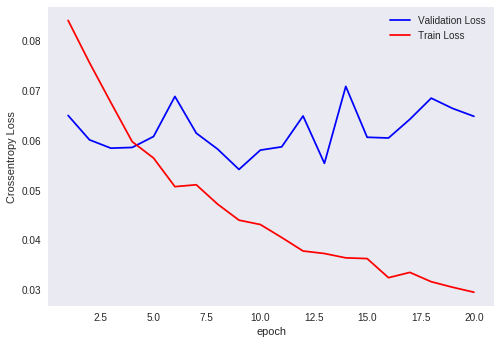

In [71]:
'''
  Basically it is the evaluation of model on overfitting if the train and validation loss had gap or difference between them then we must be sure
  that we are overfitting. So must take the accuracy where the train and validation data meets or are close to each other.
  In this case at 3rd or 4th epoch it is giving best results further it is overfitting.
'''

Plot(history)

## ***3 -  Hidden Layer Architecture***

In [72]:
'''
  Here we are declaring our model : model_relu = Sequential().
  Now we will add layers to the network.
  Dense got the output as : Output = output = activation(dot(input, kernel) + bias)
  Here the activation function used are relu and softmax.
  The initializer used is randomnormal.
  Here we had also used BatchNormalization and Dropout.
  There are 3 hidden layers -: 784(INPUT LAYER) -> 512(HIDDEN LAYER) -> 296(HIDDEN LAYER) -> 111(HIDDEN LAYER) -> 10(OUTPUT LAYER)
'''

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))
model_relu.add(Dense(296, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.6))
model_relu.add(Dense(111, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(10, activation='softmax'))

print(model_relu.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 296)               151848    
_________________________________________________________________
batch_normalization_2 (Batch (None, 296)               1184      
_________________________________________________________________
dropout_7 (Dropout)          (None, 296)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 111)               32967     
__________

In [0]:
'''
  Configuring the learning process through compile function.
  Accept three arguments optimizer, loss & metrics.
  After compiling we fit it on training data and pass the epochs and batchsize to it.
'''

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=100, epochs=30, verbose=0, validation_data=(x_test, y_test))

In [74]:
#  Analyzing the Loss and Accuracy on Test Dataset.

score = model_relu.evaluate(x_test, y_test, verbose=0) 
print('Loss:', score[0]) 
print('Accuracy:', score[1])

Loss: 0.05780171783262922
Accuracy: 0.9845


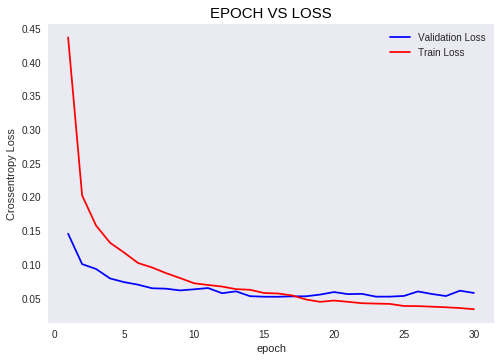

In [79]:
'''
  Basically it is the evaluation of model on overfitting if the train and validation loss had gap or difference between them then we must be sure
  that we are overfitting. So must take the accuracy where the train and validation data meets or are close to each other.
  In this case between 15th - 20th epoch it is giving best results further it is overfitting.
'''

Plot(history)

## ***5 -  Hidden Layer Architecture***

In [111]:
'''
  Here we are declaring our model : model_relu = Sequential().
  Now we will add layers to the network.
  Dense got the output as : Output = output = activation(dot(input, kernel) + bias)
  Here the activation function used are relu and softmax.
  The initializer used are randomnormal and he_normal.
  Here we had also used BatchNormalization and Dropout.
  There are 5 hidden layers -: 784(INPUT LAYER) -> 597(HIDDEN LAYER) -> 423(HIDDEN LAYER) -> 250(HIDDEN LAYER) -> 120(HIDDEN LAYER) -> 63(HIDDEN LAYER) -> 10(OUTPUT LAYER)
'''

model_relu = Sequential()
model_relu.add(Dense(597, activation='relu', input_shape=(784,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.2))
model_relu.add(Dense(423, activation='relu', kernel_initializer='he_normal'))
model_relu.add(BatchNormalization())
model_relu.add(Dense(250, activation='relu', kernel_initializer='he_normal'))
model_relu.add(BatchNormalization())
model_relu.add(Dense(120, activation='relu', kernel_initializer='he_normal'))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.3))
model_relu.add(Dense(63, activation='relu', kernel_initializer='he_normal'))
model_relu.add(BatchNormalization())
model_relu.add(Dense(10, activation='softmax'))

print(model_relu.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 597)               468645    
_________________________________________________________________
batch_normalization_14 (Batc (None, 597)               2388      
_________________________________________________________________
dropout_15 (Dropout)         (None, 597)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 423)               252954    
_________________________________________________________________
batch_normalization_15 (Batc (None, 423)               1692      
_________________________________________________________________
dense_43 (Dense)             (None, 250)               106000    
_________________________________________________________________
batch_normalization_16 (Batc (None, 250)               1000      
__________

In [0]:
'''
  Configuring the learning process through compile function.
  Accept three arguments optimizer, loss & metrics.
  After compiling we fit it on training data and pass the epochs and batchsize to it.
'''

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=100, epochs=25, verbose=0, validation_data=(x_test, y_test))

In [113]:
#  Analyzing the Loss and Accuracy on Test Dataset.

score = model_relu.evaluate(x_test, y_test, verbose=0) 
print('Loss:', score[0]) 
print('Accuracy:', score[1])

Loss: 0.06400480240903271
Accuracy: 0.9833


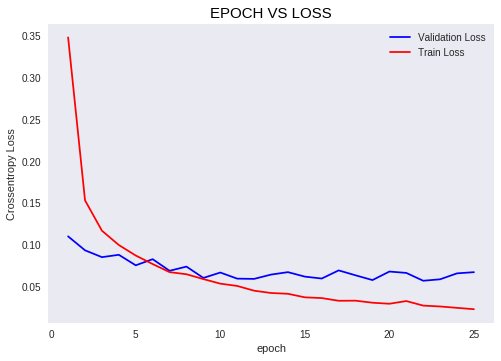

In [103]:
'''
  Basically it is the evaluation of model on overfitting if the train and validation loss had gap or difference between them then we must be sure
  that we are overfitting. So must take the accuracy where the train and validation data meets or are close to each other.
  In this case between 5th - 10th epoch it is giving best results further it is overfitting.
'''

Plot(history)

# ***CONCLUSION***

In [110]:
x = PrettyTable()
x.field_names = ["Hidden_Layers", "Losses", "Accuracy"]
x.add_row(["2-Hidden_Layer",0.0648,0.9838])
x.add_row(["3-Hidden_Layer",0.0578,0.9845])
x.add_row(["2-Hidden_Layer",0.0640,0.9833])
print(x)

+----------------+--------+----------+
| Hidden_Layers  | Losses | Accuracy |
+----------------+--------+----------+
| 2-Hidden_Layer | 0.0648 |  0.9838  |
| 3-Hidden_Layer | 0.0578 |  0.9845  |
| 2-Hidden_Layer | 0.0674 |  0.9842  |
+----------------+--------+----------+




*   From all the above architectures the one with 3 hidden layers had performed the best among three with an accuracy of 0.9845 and a loss of 0.0578.
*   We can't say that the conclusion is final as the applied optimizers, layers, batch_sizes etc are best to my knowledge but there are many methods  which may find a better solution.